In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_178418/3777615979.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
from pathlib import Path
from tokenizers import ByteLevelBPETokenizer #HugginFace
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.2f}'.format

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import functools

In [4]:
from collections import Counter

In [5]:
sns.set_theme(style="darkgrid")


In [6]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("gpt2")

/opt/conda/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [21]:
import json
json_path = '/workspaces/chat-gpt-failures/datasets/galeras_se_tasks_dataset/curatedSummarization.json'
with open(json_path) as json_file:
    json_data = json.load(json_file)

In [22]:
from collections import defaultdict

word_freqs = defaultdict(int)
corpus = [x["code"].strip() for x in json_data]
for text in corpus:
    words_with_offsets = tokenizer.backend_tokenizer.pre_tokenizer.pre_tokenize_str(text)
    new_words = [word for word, offset in words_with_offsets]
    for word in new_words:
        word_freqs[word] += 1

print(word_freqs)

defaultdict(<class 'int'>, {'def': 1052, 'Ġvalidate': 20, '_': 19919, 'autoscaling': 3, 'configs': 15, '(': 6011, 'service': 108, 'path': 462, '):': 1327, 'ĊĠĠĠĠĊĠĠĠ': 416, 'Ġsoa': 19, 'dir': 187, ',': 5628, 'Ġservice': 64, 'Ġ=': 4471, 'Ġpath': 91, 'to': 282, 'soa': 13, ')': 2919, 'ĊĠĠĠ': 2679, 'Ġreturncode': 12, 'ĠTrue': 115, 'Ġskip': 15, 'cpu': 86, 'override': 8, 'validation': 15, 'list': 176, 'Ġ(': 491, 'ĊĠĠĠĠĠĠĠ': 4264, 'Ġload': 131, 'system': 43, 'paasta': 43, 'config': 503, '().': 125, 'get': 479, 'skip': 5, 'services': 15, '()': 806, 'Ġ)': 389, 'ĊĊĠĠĠ': 733, 'Ġfor': 1073, 'Ġcluster': 21, 'Ġin': 1356, 'Ġlist': 115, 'clusters': 5, 'Ġinstance': 50, 'all': 115, 'instances': 30, 'for': 80, 'ĊĠĠĠĠĠĠĠĠĠĠĠ': 3090, '=': 1629, 'Ġclusters': 5, '=[': 52, 'cluster': 32, '],': 137, 'Ġ):': 24, 'Ġget': 300, 'instance': 41, 'ĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ': 1621, 'deployments': 12, 'False': 113, 'ĊĊĠĠĠĠĠĠĠĠĠĠĠ': 101, 'Ġif': 1902, '.': 9958, 'type': 510, 'Ġ==': 500, 'Ġ"': 1736, 'kubernetes': 12, '"': 470, 'Ġan

In [9]:
alphabet = []

for word in word_freqs.keys():
    for letter in word:
        if letter not in alphabet:
            alphabet.append(letter)
alphabet.sort()

print(alphabet)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '§', '©', 'ª', '«', '¬', '®', '¯', '°', '³', '´', 'µ', 'º', '¼', '½', '¾', '¿', 'Â', 'Ã', 'â', 'ã', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'ï', 'ĉ', 'Ċ', 'č', 'Ġ', 'Ģ', 'Ĥ', 'ĥ', 'Ħ', 'ĩ', 'Ī', 'ī', 'ĭ', 'Į', 'į', 'İ', 'ı', 'Ĳ', 'Ķ', 'ĸ', 'Ĺ', 'ĺ', 'Ļ', 'ļ', 'Ľ', 'ľ', 'ŀ', 'Ł', 'ł', 'Ń']


In [10]:
vocab = ["<|endoftext|>"] + alphabet.copy()

In [11]:
splits = {word: [c for c in word] for word in word_freqs.keys()}

In [12]:
def compute_pair_freqs(splits):
    pair_freqs = defaultdict(int)
    for word, freq in word_freqs.items():
        split = splits[word]
        if len(split) == 1:
            continue
        for i in range(len(split) - 1):
            pair = (split[i], split[i + 1])
            pair_freqs[pair] += freq
    return pair_freqs

In [13]:
pair_freqs = compute_pair_freqs(splits)

for i, key in enumerate(pair_freqs.keys()):
    print(f"{key}: {pair_freqs[key]}")
    if i >= 5:
        break

('d', 'e'): 15299
('e', 'f'): 4994
('Ġ', 'g'): 2297
('g', 'e'): 7742
('e', 't'): 15776
('f', 'a'): 2250


In [14]:
best_pair = ""
max_freq = None

for pair, freq in pair_freqs.items():
    if max_freq is None or max_freq < freq:
        best_pair = pair
        max_freq = freq

print(best_pair, max_freq)

('Ġ', 'Ġ') 496308


In [15]:
merges = {("Ġ", "t"): "Ġt"}
vocab.append("Ġt")

In [16]:
def merge_pair(a, b, splits):
    for word in word_freqs:
        split = splits[word]
        if len(split) == 1:
            continue

        i = 0
        while i < len(split) - 1:
            if split[i] == a and split[i + 1] == b:
                split = split[:i] + [a + b] + split[i + 2 :]
            else:
                i += 1
        splits[word] = split
    return splits

In [17]:
splits = merge_pair("Ġ", "t", splits)
print(splits["Ġtrained"])

['Ġt', 'r', 'a', 'i', 'n', 'e', 'd']


In [18]:
vocab_size = 50000

In [19]:
len(vocab)

160

In [20]:
while len(vocab) < vocab_size:
    pair_freqs = compute_pair_freqs(splits)
    best_pair = ""
    max_freq = None
    for pair, freq in pair_freqs.items():
        if max_freq is None or max_freq < freq:
            best_pair = pair
            max_freq = freq
    splits = merge_pair(*best_pair, splits)
    merges[best_pair] = best_pair[0] + best_pair[1]
    vocab.append(best_pair[0] + best_pair[1])

TypeError: merge_pair() missing 2 required positional arguments: 'b' and 'splits'

In [55]:
print(merges)

{('Ġ', 't'): 'Ġt', ('Ġ', 'Ġ'): 'ĠĠ', ('ĠĠ', 'ĠĠ'): 'ĠĠĠĠ', ('ĠĠ', 'Ġ'): 'ĠĠĠ', ('ĠĠĠĠ', 'ĠĠĠĠ'): 'ĠĠĠĠĠĠĠĠ', ('ĠĠĠĠ', 'ĠĠĠ'): 'ĠĠĠĠĠĠĠ', ('Ċ', 'ĠĠĠĠĠĠĠĠ'): 'ĊĠĠĠĠĠĠĠĠ', ('e', 'r'): 'er', ('i', 'n'): 'in', ('a', 't'): 'at', ('r', 'e'): 're', ('Ċ', 'ĠĠĠĠĠĠĠ'): 'ĊĠĠĠĠĠĠĠ', ('o', 'n'): 'on', ('s', 'e'): 'se', ('s', 't'): 'st', ('Ġ', '='): 'Ġ=', ('o', 'r'): 'or', ('e', 'n'): 'en', ('Ċ', 'ĠĠĠ'): 'ĊĠĠĠ', ('d', 'e'): 'de', ('ĊĠĠĠĠĠĠĠĠ', 'ĠĠĠ'): 'ĊĠĠĠĠĠĠĠĠĠĠĠ', ('a', 'l'): 'al', ('a', 'r'): 'ar', ('Ġ', '"'): 'Ġ"', ('m', 'e'): 'me', ('-', '-'): '--', ('Ġ', 'c'): 'Ġc', ('Ġ', 'i'): 'Ġi', ('c', 'e'): 'ce', ('l', 'e'): 'le', ('a', 'n'): 'an', ('Ġ', 'f'): 'Ġf', ('l', 'o'): 'lo', ('i', 't'): 'it', ('f', 'i'): 'fi', ('g', 'e'): 'ge', ('se', 'l'): 'sel', ('sel', 'f'): 'self', ('ĊĠĠĠĠĠĠĠĠ', 'ĠĠĠĠĠĠĠĠ'): 'ĊĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠĠ', ('m', 'o'): 'mo', ('c', 'h'): 'ch', ('a', 's'): 'as', ('r', 'o'): 'ro', ('e', 'd'): 'ed', ('d', 'at'): 'dat', ('i', 'on'): 'ion', ('Ġ', 'in'): 'Ġin', ('u', 'r'): 'ur', ('c', 'k'): 'ck

In [56]:
print(vocab)

['<|endoftext|>', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '§', '©', 'ª', '«', '¬', '®', '¯', '°', '³', '´', 'µ', 'º', '¼', '½', '¾', '¿', 'Â', 'Ã', 'â', 'ã', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'ï', 'ĉ', 'Ċ', 'č', 'Ġ', 'Ģ', 'Ĥ', 'ĥ', 'Ħ', 'ĩ', 'Ī', 'ī', 'ĭ', 'Į', 'į', 'İ', 'ı', 'Ĳ', 'Ķ', 'ĸ', 'Ĺ', 'ĺ', 'Ļ', 'ļ', 'Ľ', 'ľ', 'ŀ', 'Ł', 'ł', 'Ń', 'Ġt', 'ĠĠ', 'ĠĠĠĠ', 'ĠĠĠ', 'ĠĠĠĠĠĠĠĠ', 'ĠĠĠĠĠĠĠ', 'ĊĠĠĠĠĠĠĠĠ', 'er', 'in', 'at', 're', 'ĊĠĠĠĠĠĠĠ', 'on', 'se', 'st', 'Ġ=', 'or', 'en', 'ĊĠĠĠ', 'de', 'ĊĠĠĠĠĠĠĠĠĠĠĠ', 'al', 'ar', 'Ġ"', 'me', '-

In [57]:
def tokenize(text):
    pre_tokenize_result = tokenizer._tokenizer.pre_tokenizer.pre_tokenize_str(text)
    pre_tokenized_text = [word for word, offset in pre_tokenize_result]
    splits = [[l for l in word] for word in pre_tokenized_text]
    for pair, merge in merges.items():
        for idx, split in enumerate(splits):
            i = 0
            while i < len(split) - 1:
                if split[i] == pair[0] and split[i + 1] == pair[1]:
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[idx] = split

    return sum(splits, [])

In [58]:
tokenize("def function:")

['def', 'Ġf', 'unction', ':']

In [59]:
bpe_tokenized = [tokenize(x["code"].strip())for x in json_data]

In [79]:
ground_truth = [[x["code"].strip(),len(x["code"].split()), len(bpe_tokenized[i])] for i, x in enumerate(json_data)]

In [81]:
bpe_control = [tokenize(x["predicted_control"].strip())for x in json_data]

In [82]:
control_t = [[x["predicted_control"].strip(),len(x["predicted_control"].split()), len(bpe_control[i])] for i, x in enumerate(json_data)]

In [88]:
assert len(control_t) == len(ground_truth)

In [65]:
def method_size_df(ground_truth,control_t):
    df_code = {}
    df = pd.concat( [ground_truth, control_t], axis=1 ) 
    df_code  = df[['method_size0','method_size1']]
    return df_code

In [113]:
gt_df = pd.DataFrame(ground_truth)
gt_df = gt_df.set_axis(["code","words0","gt_bpe_tokens"], axis=1)

In [114]:
control_df = pd.DataFrame(control_t)
control_df = control_df.set_axis(["predicted_control","words1","control_bpe_tokens"], axis=1)

In [115]:
result = pd.concat([gt_df,control_df], axis=1)

In [116]:
result[["words0","words1"]].head()

,words0,words1
0,46,95
1,141,29
2,95,7
3,61,236
4,35,23


Text(0.5, 1.0, 'test')

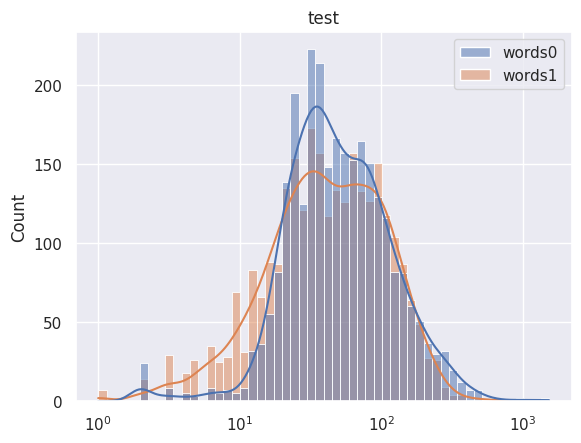

In [117]:
sns.histplot(data=result[["words0","words1"]], kde=True, log_scale=True).set_title("test")

Text(0.5, 1.0, 'BPE tokens')

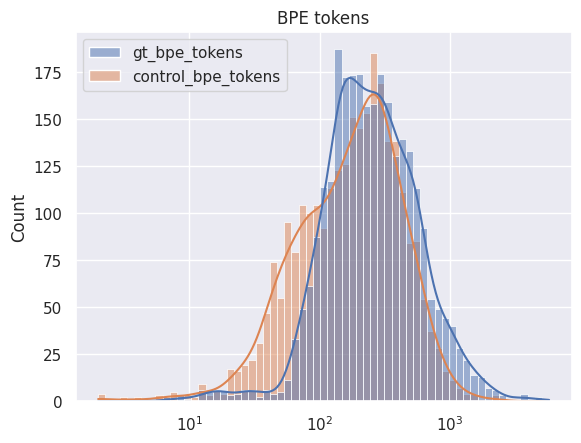

In [119]:
sns.histplot(data=result[["gt_bpe_tokens","control_bpe_tokens"]], kde=True, log_scale=True).set_title("BPE tokens")

Text(0.5, 1.0, 'BPE Tokens')

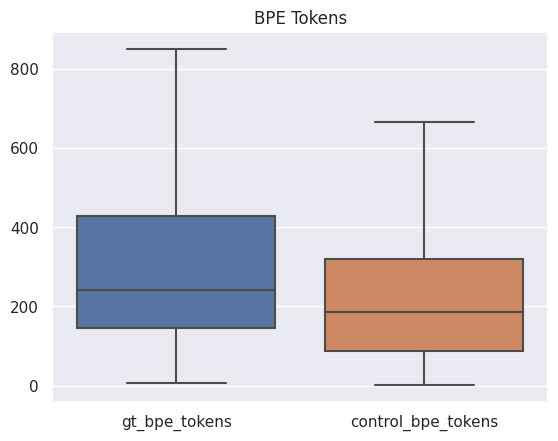

In [121]:
sns.boxplot(data=result[["gt_bpe_tokens","control_bpe_tokens"]], showfliers=False).set_title("BPE Tokens")

In [123]:
token_count = result.sum()
token_count

code                  def get_default_git_remote():\n    system_paas...
words0                                                           201074
gt_bpe_tokens                                                    981295
predicted_control     I have completed the code as requested:\n\n```...
words1                                                           167433
control_bpe_tokens                                               669141
dtype: object

In [124]:
bpe_tokenized_df = pd.DataFrame(bpe_tokenized)

In [125]:
bpe_tokenized_df.head()

,0,1,2,3,4,5,6,7,8,9,...,5749,5750,5751,5752,5753,5754,5755,5756,5757,5758
0,def,Ġget,_,default,_,g,it,_,re,mo,...,None,None,None,None,None,None,None,None,None,None
1,def,Ġma,in,(,args,):,ĊĠĠĠ,Ġ,up,dat,...,None,None,None,None,None,None,None,None,None,None
2,def,Ġpar,se,_,args,():,ĊĠĠĠ,Ġpar,ser,Ġ=,...,None,None,None,None,None,None,None,None,None,None
3,def,Ġtest,_,sy,nc,_,all,_,secrets,(,...,None,None,None,None,None,None,None,None,None,None
4,def,Ġget,_,config,_,file,_,dict,(,file,...,None,None,None,None,None,None,None,None,None,None


In [140]:
counter_tokens = [Counter(bpe_list) for bpe_list in bpe_tokenized]


In [141]:
counter_tokens[2]

Counter({'ĊĠĠĠĠĠĠĠ': 26,
         '",': 26,
         'ĊĠĠĠ': 18,
         '="': 18,
         '_': 16,
         'Ġpar': 11,
         'ser': 11,
         '.': 11,
         '(': 9,
         'Ġ"': 9,
         'Ġre': 9,
         '=': 9,
         ',': 9,
         'add': 8,
         'argument': 8,
         '--': 8,
         'Ġhelp': 8,
         'st': 8,
         'Ġ)': 8,
         'Ġde': 7,
         's': 6,
         'Ġto': 6,
         'qui': 6,
         'red': 6,
         'se': 5,
         'it': 5,
         '-': 5,
         'mo': 5,
         'er': 5,
         'Ġ': 4,
         'g': 4,
         're': 4,
         'True': 4,
         'Ġthe': 4,
         'S': 4,
         'ard': 4,
         'args': 3,
         'te': 3,
         'Ġdefault': 3,
         'None': 3,
         'b': 3,
         'ran': 3,
         'ch': 3,
         'sh': 3,
         'local': 3,
         'ver': 3,
         'h': 3,
         'par': 2,
         'A': 2,
         'a': 2,
         'Ġg': 2,
         'Ġname': 2,
         'dir': 2,
 

In [147]:
total_token_count = Counter()
for row in counter_tokens:
    total_token_count = total_token_count+row


In [167]:
def print_token_distribution( dict_most, ax, log = False, label=['Control'], title='' ):

    
    ax.bar(dict_most.keys(), dict_most.values(), width=(0.3*((-1)**10)), align='edge', alpha=.6, label="test")
    
    ax.set_ylabel('N. Tokens')
    ax.set_title('Token by taxonomy '+ title)
    ax.legend()

    if log:
        ax.set_yscale("log")


In [153]:
TOK=10

In [164]:
dict_most =dict(total_token_count.most_common(TOK))

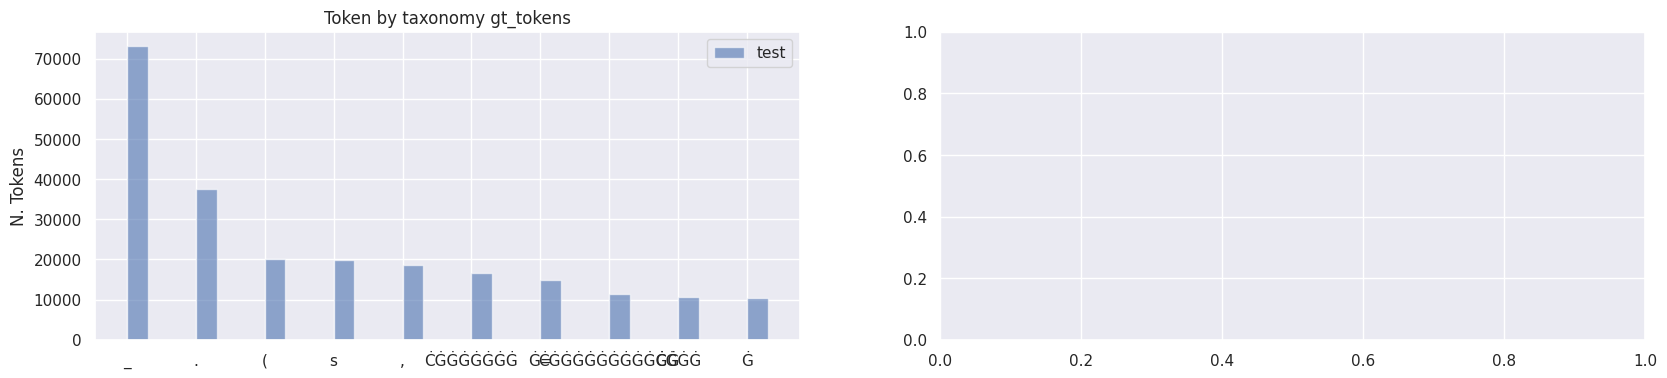

In [168]:
fig, axs = plt.subplots( figsize=(20,4), ncols=2 )

print_token_distribution( dict_most, axs[0], label=['inputs'], title= 'gt_tokens')

In [60]:
pd.read_json(json_path)

,repo,path,file_name,fun_name,commit_message,code,random_split,signature,tested_class,docstring,...,language,ast_errors,n_ast_errors,ast_levels,n_whitespaces_,complexity,nloc,token_counts,n_ast_nodes,predicted_control
0,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,get_default_git_remote,adds service_shard_remove script,def get_default_git_remote():\n system_paas...,def get_default_git_remote():\n system_paas...,def get_default_git_remote(),,None,...,python,[],0,11,46,1,9,47,185,I have completed the code as requested:\n\n```...
1,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,main,adds service_shard_remove script,def main(args):\n updater = AutoConfigUpdat...,def main(args):\n updater = AutoConfigUpdat...,def main(args),,None,...,python,[],0,15,141,7,38,233,493,targeted_step']\n\n # Remove shard from...
2,paasta,paasta_tools/contrib/service_shard_remove.py,service_shard_remove.py,parse_args,adds service_shard_remove script,def parse_args():\n parser = argparse.Argum...,def parse_args():\n parser = argparse.Argum...,def parse_args(),,None,...,python,[],0,10,95,1,45,182,308,"dest=""local_dir"",\n )\n \n args = par..."
3,paasta,tests/kubernetes/bin/test_paasta_secrets_sync.py,test_paasta_secrets_sync.py,test_sync_all_secrets,Mock load_system_paasta_config in a test,def test_sync_all_secrets(namespace):\n wit...,def test_sync_all_secrets(namespace):\n wit...,def test_sync_all_secrets(namespace),,None,...,python,"[@pytest.mark.parametrize(""namespace"", [None, ...",1,13,61,1,37,178,314,"Code:\n\n```\nfrom typing import List, Dict\nf..."
4,paasta,paasta_tools/cli/cmds/validate.py,validate.py,get_config_file_dict,Add validation for users overriding CPU reques...,def get_config_file_dict(file_path) -> Dict[An...,def get_config_file_dict(file_path) -> Dict[An...,def get_config_file_dict(file_path) -> Dict[An...,,None,...,python,[],0,12,35,4,14,80,141,yaml.safe_load(config_file)\n elif exte...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,tiktoken,tiktoken/registry.py,registry.py,_find_constructors,[tiktoken] hello world,def _find_constructors() -> None:\n global ...,def _find_constructors() -> None:\n global ...,def _find_constructors() -> None,,None,...,python,[],0,17,125,6,21,103,184,def _find_constructors() -> None:\n global ...
2783,tiktoken,tiktoken_ext/openai_public.py,openai_public.py,gpt2,[tiktoken] hello world,def gpt2():\n mergeable_ranks = data_gym_to...,def gpt2():\n mergeable_ranks = data_gym_to...,def gpt2(),,'s|'t|'re|'ve|'m|'ll|'d| ?\p{L}+| ?\p{N}+| ?[^...,...,python,[],0,10,22,1,12,45,83,```\ndef gpt2():\n mergeable_ranks = data_g...
2784,tiktoken,tiktoken_ext/openai_public.py,openai_public.py,cl100k_base,[tiktoken] hello world,def cl100k_base():\n mergeable_ranks = load...,def cl100k_base():\n mergeable_ranks = load...,def cl100k_base(),,(?i:'s|'t|'re|'ve|'m|'ll|'d)|[^\r\n\p{L}\p{N}]...,...,python,[],0,9,36,1,15,54,109,def cl100k_base():\n mergeable_ranks = load...
2785,tiktoken,tests/test_simple_public.py,test_simple_public.py,test_simple,Build wheels; update codebase,def test_simple():\n enc = tiktoken.get_enc...,def test_simple():\n enc = tiktoken.get_enc...,def test_simple(),,None,...,python,[],0,9,32,1,7,72,122,"Sorry, it seems like the code snippet is incom..."


In [ ]:
confunders = [""]